# Machine Learning with Support Vector Machines and Parameter Tuning

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [27]:
iris = sns.load_dataset('iris')

## Exploratory Analysis

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


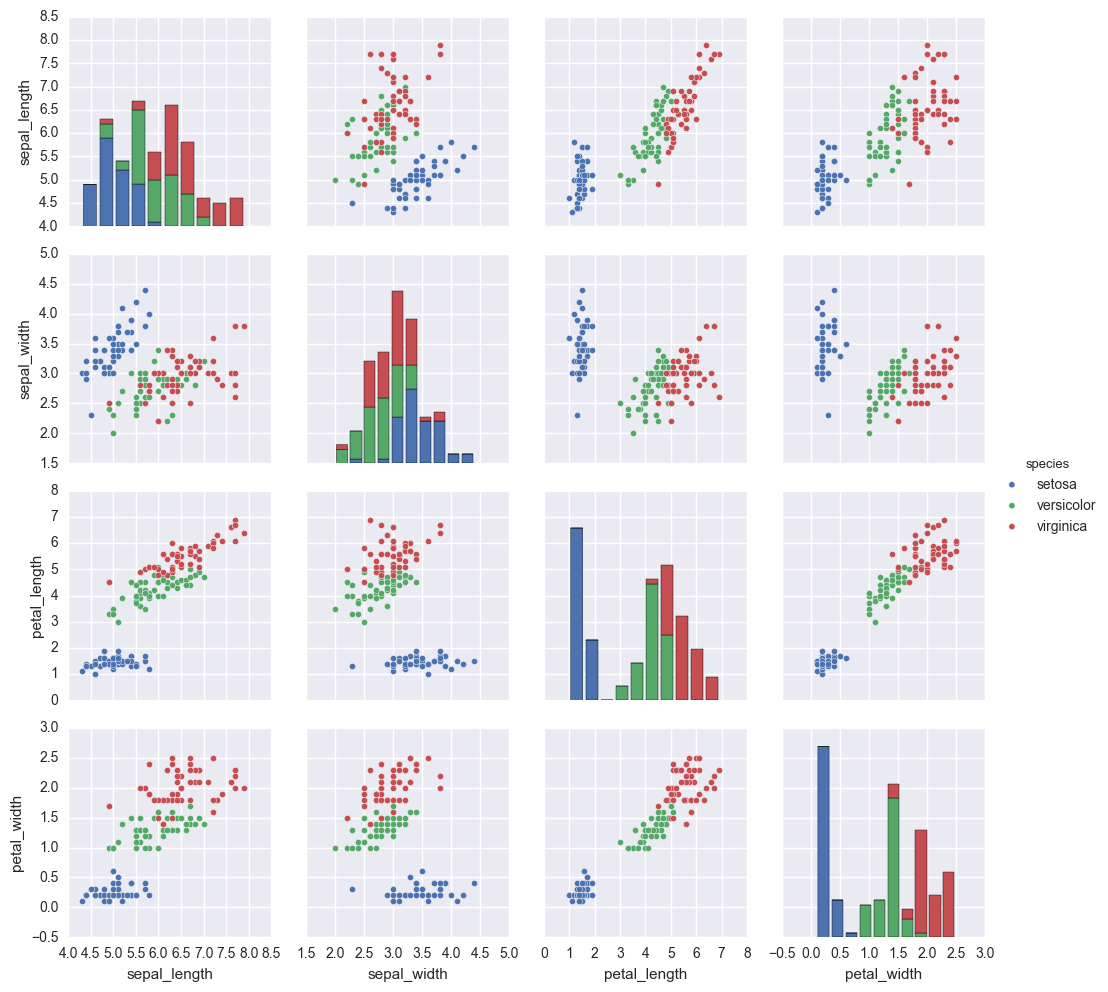

In [29]:
sns.pairplot(iris,hue='species')

# Model Building

In [41]:
from sklearn.model_selection import train_test_split

X = iris.drop('species',axis=1)

y = iris['species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Now its time to train a Support Vector Machine Classifier. 

In [42]:
from sklearn.svm import SVC

sv = SVC()

sv.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations

In [43]:
preds = sv.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,preds))

[[14  0  0]
 [ 0 12  2]
 [ 0  0 17]]


In [45]:
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       1.00      0.86      0.92        14
  virginica       0.89      1.00      0.94        17

avg / total       0.96      0.96      0.96        45



## Parameter Tuning using GridSearch

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
#Defining the initial parameter grid to search in
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [53]:
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### New Predictions and Results

In [49]:
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test,grid_predictions))

[[14  0  0]
 [ 0 13  1]
 [ 0  0 17]]


In [50]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        14
 versicolor       1.00      0.93      0.96        14
  virginica       0.94      1.00      0.97        17

avg / total       0.98      0.98      0.98        45

